Version 2025.01.16 - A. Lundervold

(Modified from [TabPFN Demo V1 Local](https://colab.research.google.com/drive/1SHa43VuHASLjevzO7y3-wPCxHY18-2H6?usp=sharing), using `bmed365-cuda` conda environment or Google Colab)

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219-2025/blob/main/Lab2-DL/notebooks/03-TabPFN-example.ipynb)

## TabPFN: A Revolutionary Approach to Analyzing Small Medical Datasets using Deep Learning

### Key Points for Medical Students

#### What is TabPFN?
- A new machine learning model specifically designed for analyzing small-to-medium sized tabular datasets (up to 10,000 samples)
- Particularly relevant for medical research where large datasets are often unavailable
- Outperforms traditional methods like XGBoost and CatBoost with significantly less training time

#### Why is it Important for Medicine?
1. **Speed and Efficiency**
   - Can analyze data in seconds rather than hours
   - No need for extensive hyperparameter tuning
   - Perfect for rapid clinical research and analysis

2. **Small Dataset Capability**
   - Excels with limited data (common in medical research)
   - Maintains high accuracy even with small sample sizes
   - Particularly useful for rare disease studies or pilot research

3. **Key Features Relevant to Medical Research**
   - Handles missing data effectively
   - Works well with both categorical and numerical data
   - Built-in uncertainty estimation
   - Can detect outliers and anomalies
   - Provides interpretable results

#### Practical Applications in Medicine
1. **Clinical Decision Support**
   - Risk prediction models
   - Patient outcome prediction
   - Treatment response analysis

2. **Medical Research**
   - Biomedical risk models
   - Drug discovery
   - Clinical trial data analysis
   - Patient stratification

3. **Data Analysis**
   - Handles common medical data challenges
   - Works with mixed data types (lab values, patient demographics, etc.)
   - Can process both structured and categorical medical data

#### Advantages Over Traditional Methods
- Faster analysis (2.8s vs. 4 hours for traditional methods)
- Better performance on small datasets
- More robust to missing data
- Built-in uncertainty estimation
- No need for extensive data preprocessing



### Traditional Deep Learning vs TabPFN's Approach

#### Traditional Challenges
- Deep learning has historically struggled with tabular data
- Neural networks typically perform poorly compared to tree-based methods (like XGBoost)
- Usually requires large datasets to be effective

#### TabPFN's Novel Solution
1. **Innovative Architecture**
   - Uses a modified transformer architecture
   - Specifically designed for tabular data
   - Treats each cell in the table as a separate representation
   - Combines feature and sample attention mechanisms

2. **Pre-training Strategy**
   - Pre-trained on millions of synthetic datasets
   - Uses in-context learning (ICL), similar to large language models
   - Learns to understand relationships in tabular data
   - No need for traditional gradient-based training on new datasets

### Key Deep Learning Components

#### Architecture Details
- Two-way attention mechanism:
  - Attention across features in each row
  - Attention across samples for each feature
- Memory-efficient design
- Optimized for small-to-medium datasets
- Can handle up to 10,000 samples and 500 features

#### Training Innovation
1. **Synthetic Data Training**
   - Trained on ~130 million synthetic datasets
   - Uses structural causal models
   - Learns general patterns and relationships
   - No need for real-world data in pre-training

2. **In-Context Learning**
   - Similar to modern language models
   - Can adapt to new datasets without traditional training
   - Single forward pass prediction
   - No fine-tuning required for new tasks

### Advantages Over Traditional Deep Learning

1. **Performance**
   - Better results than standard neural networks
   - Competitive with or superior to tree-based methods
   - Works well with limited data

2. **Efficiency**
   - No need for dataset-specific training
   - Fast inference time
   - Lower computational requirements
   - GPU acceleration optional but not required

3. **Practicality**
   - Handles missing values automatically
   - Works with mixed data types
   - Built-in uncertainty estimation
   - More interpretable than traditional deep learning

### Impact
This approach represents a significant shift in how deep learning can be applied to tabular data, making it more practical and effective for real-world applications, particularly in fields like healthcare where data is often limited but structured.

## TabPFN exploration

Welcome to the hands-on Colab notebook for TabPFN!
This code shows how to locally (with GPU support) install and run TabPFN. For fast inference with additional features use **[TabPFN client](https://tinyurl.com/tabpfn-colab-online)**.

**Installation**
* First, copy the notebook to be able to modify it.
* Then, run the cells in the installation block, this should
be good enough!

---

> 🔵 **Hint** <br>
We recommend first enabling the **Table of Contents** with the `☰` icon in the top left and collapsing all sections by selecting all cells `Ctrl + Shift + A` and then pressing `Ctrl + ]`.

---

Thank you to [Lennart Purucker](https://github.com/LennartPurucker) for providing the original version of this notebook!

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [2]:
if is_colab:
    # Install sklearn
    #!pip install scikit-learn==1.5.2

    # Install TorchGeometric
    !pip install torch-geometric

    # Install TabPFN
    !pip install tabpfn

    # TabPFN Extensions installs optional functionalities around the TabPFN model
    # These include post-hoc ensembles, interpretability tools, and more
    !git clone https://github.com/PriorLabs/tabpfn-extensions
    !pip install -e tabpfn-extensions
    !pip install tabpfn-extensions

    # Install hyperopt library for hyperparameter optimization
    !pip install hyperopt

    # Install Baselines
    !pip install catboost xgboost

    # Install example datasets
    !pip install datasets
else:
    print("This code is not running in Colab.")


This code is not running in Colab.


**Now Restart the Runtime**

### Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




#### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [3]:
import os
import requests
from io import StringIO
from urllib.error import URLError  # Add this import

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch
import torch_geometric
import shap

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

In [4]:
print("torch:", torch.__version__)
print("torch_geometric:", torch_geometric.__version__)
print("shap:", shap.__version__)
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.get_device_name(0):", torch.cuda.get_device_name(0))
print("torch.cuda.get_device_properties(0):", torch.cuda.get_device_properties(0))

torch: 2.5.1
torch_geometric: 2.6.1
shap: 0.46.0
torch.cuda.is_available(): True
torch.cuda.get_device_name(0): NVIDIA RTX A5000 Laptop GPU
torch.cuda.get_device_properties(0): _CudaDeviceProperties(name='NVIDIA RTX A5000 Laptop GPU', major=8, minor=6, total_memory=16116MB, multi_processor_count=48, uuid=f78ec681-cecf-19d1-6cf7-0ac2e2802823, L2_cache_size=4MB)


# Predicting with TabPFN

For our first example, we will use the client to predict on [toy data from scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

## Classification

We now compare the classification performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure classification performance using [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) (see also [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)). These toy datasets are simple to solve, so the ROC AUC will be very high.

In [5]:
def load_dataset(dataset_name='breast_cancer', fallback='iris'):
    """
    Load a dataset with fallback option if OpenML fails
    
    Parameters:
    -----------
    dataset_name : str
        Name of OpenML dataset to try first
    fallback : str
        Name of sklearn built-in dataset to use as fallback
        Options: 'iris', 'breast_cancer', 'diabetes'
        
    Returns:
    --------
    X : array-like
        Features
    y : array-like 
        Target variable
    """
    try:
        # Try OpenML first
        df = fetch_openml(dataset_name)
        return df.data, df.target
        
    except (URLError, TimeoutError) as e:
        print(f"Error fetching {dataset_name} from OpenML: {e}")
        print(f"Using sklearn's built-in {fallback} dataset instead...")
        
        # Fallback to sklearn built-in dataset
        if fallback == 'breast_cancer':
            from sklearn.datasets import load_breast_cancer
            data = load_breast_cancer()
        elif fallback == 'diabetes':
            from sklearn.datasets import load_diabetes 
            data = load_diabetes()
        elif fallback == 'iris':
            from sklearn.datasets import load_iris
            data = load_iris()
        else:
            raise ValueError(f"Unknown fallback dataset: {fallback}. Choose from: 'iris', 'breast_cancer', 'diabetes'")
            
        return data.data, data.target

In [6]:
# Import the Parkinson's dataset from sklearn.datasets
from sklearn.datasets import make_classification

def create_parkinsons_dataset():
    """
    Create a synthetic Parkinson's-like dataset since scikit-learn doesn't have 
    the real Parkinson's dataset built-in.
    
    Returns:
    --------
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values (0 for healthy, 1 for Parkinson's).
    """
    # Create synthetic data with similar properties to Parkinson's dataset
    # (195 samples, 22 features, binary classification)
    X, y = make_classification(
        n_samples=195,
        n_features=22,
        n_redundant=0,
        n_informative=15,
        random_state=42,
        n_clusters_per_class=2,
        class_sep=0.8
    )
    return X, y

# Load data
try:
    # First try the synthetic Parkinson's dataset
    X, y = create_parkinsons_dataset()
    dataset_name = "Synthetic Parkinson's"
except:
    # If that fails, fall back to iris dataset
    print("Using iris dataset as fallback...")
    from sklearn.datasets import load_iris
    data = load_iris()
    X, y = data.data, data.target
    dataset_name = "Iris"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2


In [7]:
def load_parkinsons_data(fallback_to_breast_cancer=True):
   """
   Download and prepare the Parkinson's Disease dataset from UCI repository.
   
   Parameters:
   -----------
   fallback_to_breast_cancer : bool, default=True
       If True, falls back to breast cancer dataset if Parkinson's data cannot be loaded.
       
   Returns:
   --------
   X : pandas.DataFrame
       Feature matrix
   y : pandas.Series
       Target vector
   dataset_name : str
       Name of the actually loaded dataset ('parkinsons' or 'breast_cancer')
   """
   
   url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
   
   try:
       # Download data with increased timeout
       response = requests.get(url, timeout=30)
       response.raise_for_status()
       
       # Read the CSV data
       df = pd.read_csv(StringIO(response.text))
       
       # Prepare features (X) and target (y)
       X = df.drop(['name', 'status'], axis=1)
       y = df['status']
       
       print("Successfully loaded Parkinson's dataset")
       print(f"Dataset shape: {X.shape}")
       print("\nFeatures:", ', '.join(X.columns))
       print(f"\nClass distribution:\n{y.value_counts(normalize=True).round(3)}")
       
       return X, y, 'parkinsons'

   except (requests.exceptions.RequestException, pd.errors.EmptyDataError) as e:
       print(f"Error downloading/processing Parkinson's data: {e}")
       
       if not fallback_to_breast_cancer:
           raise e
           
       print("Falling back to breast cancer dataset...")
       
       # Fallback to breast cancer dataset
       data = load_breast_cancer()
       X = pd.DataFrame(data.data, columns=data.feature_names)
       y = pd.Series(data.target)
       
       print(f"\nLoaded breast cancer dataset instead")
       print(f"Dataset shape: {X.shape}")
       print(f"Features: {', '.join(data.feature_names)}")
       print(f"\nClass distribution:\n{pd.Series(y).value_counts(normalize=True).round(3)}")
       
       return X, y, 'breast_cancer'

# Example usage:
if __name__ == "__main__":
   import pandas as pd
   from sklearn.datasets import load_breast_cancer
   from sklearn.model_selection import train_test_split
   
   # Load the data
   #X, y, dataset_name = load_parkinsons_data()
   
   # Split the data
   #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
   print(f"\nLoaded {dataset_name} dataset")
   #print("\nData split complete:")
   #print(f"Training set shape: {X_train.shape}")
   #print(f"Test set shape: {X_test.shape}")


Loaded Synthetic Parkinson's dataset


In [8]:
# Explain the data and show examples

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Since X is a numpy array, we can't access columns directly
# Instead, we can create generic feature names if needed
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]
print("\nFeature names:")
print(feature_names)

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22']


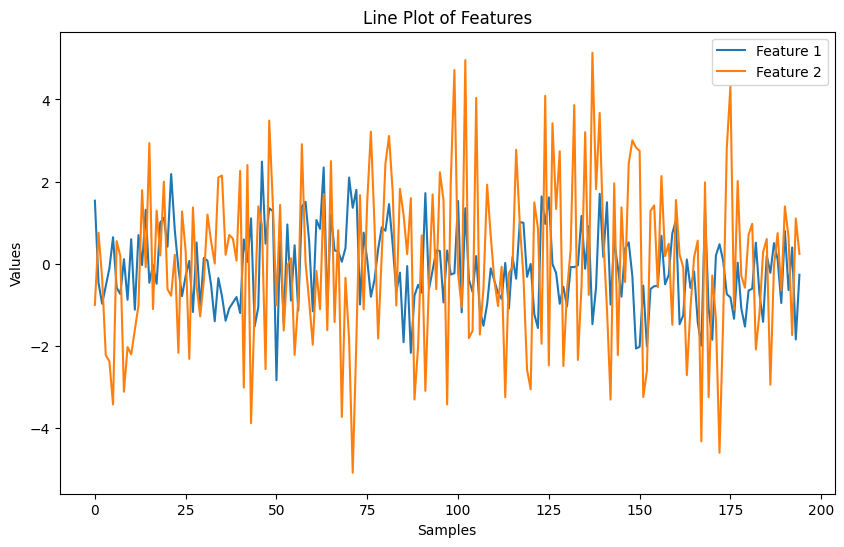

In [9]:
# Make lineplot of some data with their labels
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], label='Feature 1')
plt.plot(X[:, 1], label='Feature 2')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Line Plot of Features')
plt.legend()
plt.show()


In [10]:
X.shape

(195, 22)

In [11]:
%%time
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
#df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')

# X, y = df.data, df.target

# Load data with iris as fallback
#X, y = load_dataset('parkinsons', fallback='iris')
X, y, dataset_name = load_parkinsons_data()

# Encode target labels to classes (not needed for iris as it's already encoded)
if not isinstance(y[0], (int, np.integer)):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert all categorical columns to numeric (not needed for iris as it's already numeric)
if isinstance(X, pd.DataFrame):
    for col in X.select_dtypes(['category']).columns:
        X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
if isinstance(X, pd.DataFrame):
    print("\nFeature names:")
    print(X.columns.tolist())

Successfully loaded Parkinson's dataset
Dataset shape: (195, 22)

Features: MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE

Class distribution:
status
1    0.754
0    0.246
Name: proportion, dtype: float64
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
CPU times: user 21.2 ms, sys: 1.15 ms, total: 22.4 ms
Wall time: 1.2 s


In [12]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 0.9598
TabPFN Accuracy: 0.9487

Confusion Matrix:
[[ 5  2]
 [ 0 32]]
CPU times: user 1.18 s, sys: 209 ms, total: 1.39 s
Wall time: 930 ms


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

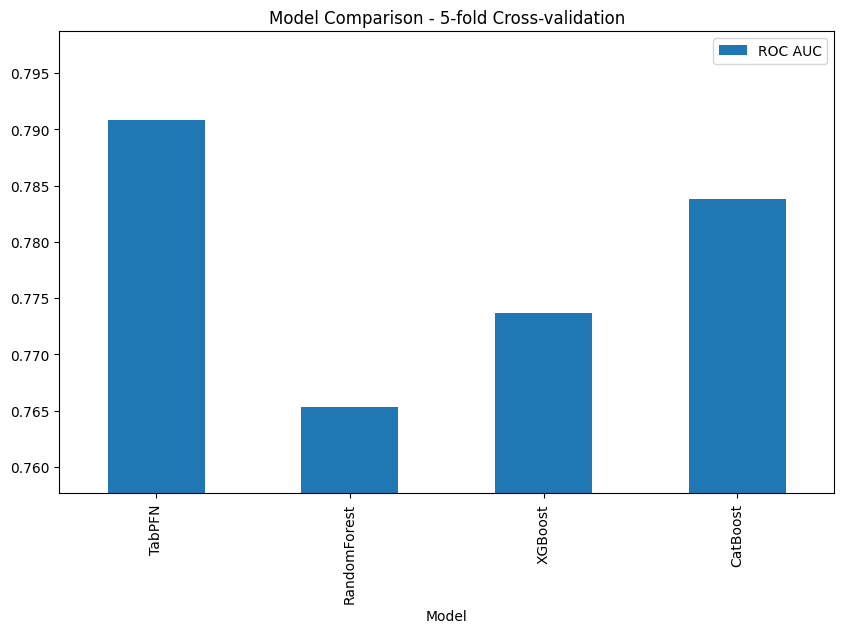

In [13]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [14]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = AutoTabPFNClassifier(max_time=30) # runs for 30 seconds, longer ensembling time leads to better results
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

2025-01-16 21:03:17 INFO     Using `default` preset for Post Hoc Ensemble.
2025-01-16 21:03:17 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-01-16 21:03:17 INFO     Using task type: TaskType.BINARY
2025-01-16 21:03:17 INFO     Obtaining TabPFN models from a random portfolio.


2025-01-16 21:03:17 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf_pfn_model_24', 'random_tabpfn_model_25', 'random_rf_pfn_model_26', 'random_tabpfn_model_27', 'random_tabpfn_model_28', 'random_tabpfn_model_29', 'random_tabpfn_model_30', 'random_tabpfn_model_31', 'random_tabpfn_model_32', 'random_tabpfn_model_33', 'random_tabpfn_model_34', 'random_tabpfn_model_35', 'random_rf_pfn_model

ROC AUC: 0.9961761440730232
Accuracy 0.9680851063829787


## Regression

We now compare the regression performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure regression performance using [Root Mean Squared Error](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_error.html).

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and


Loaded diabetes dataset
Dataset shape: (442, 10)

Feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Data split complete:
Training set shape: (353, 10)
Test set shape: (89, 10)

Results:
Mean Squared Error: 0.4507
R² Score: 0.4955


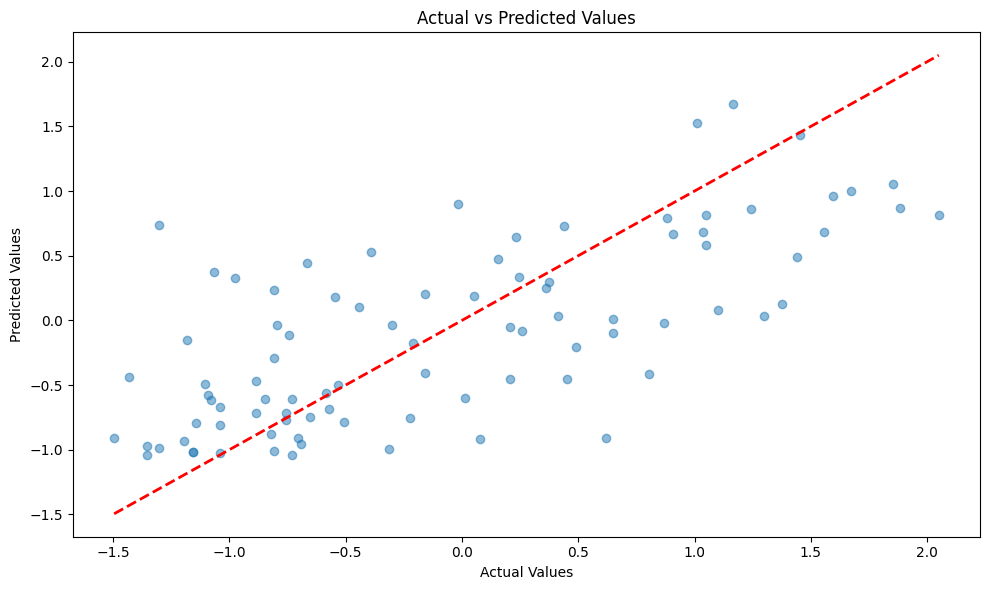

In [15]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor

def load_dataset(dataset_name='diabetes'):
    """
    Load the diabetes dataset for regression
    
    Returns:
    --------
    X : array-like
        Feature matrix
    y : array-like
        Target vector
    feature_names : list
        Names of features
    """
    try:
        data = load_diabetes()
        X = data.data
        y = data.target
        feature_names = data.feature_names
            
        print(f"\nLoaded {dataset_name} dataset")
        print(f"Dataset shape: {X.shape}")
        print("\nFeature names:")
        print(feature_names)
        
        return X, y, feature_names
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None, None

# Load data
X, y, feature_names = load_dataset('diabetes')

# Scale the target variable (important for regression)
y = (y - y.mean()) / y.std()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData split complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train TabPFN
regressor = TabPFNRegressor(device='cuda')  # Removed N_ensemble_configurations
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResults:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [16]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s

#Using scikit-learn's built-in diabetes dataset (since Boston Housing is deprecated)
#df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

#X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
#for col in X.select_dtypes(['object', 'category']).columns:
#    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset description
#display(Markdown(df['DESCR']))

#display(X)

In [17]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

TabPFN RMSE: 0.6706


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

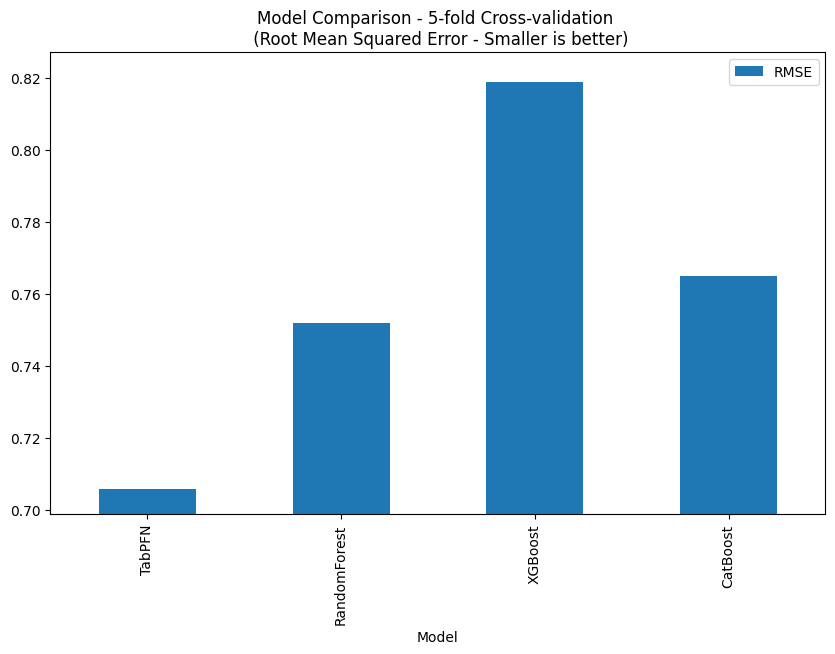

In [18]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [19]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = AutoTabPFNRegressor(max_time=30) # runs for 30 seconds
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

2025-01-16 21:04:36 INFO     Using `default` preset for Post Hoc Ensemble.
2025-01-16 21:04:36 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-01-16 21:04:36 INFO     Using task type: TaskType.REGRESSION
2025-01-16 21:04:36 INFO     Obtaining TabPFN models from a random portfolio.
2025-01-16 21:04:36 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_tabpfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_rf_pfn_model_6', 'random_rf_pfn_model_7', 'random_tabpfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_rf_pfn_model_13', 'random_tabpfn_model_14', 'random_tabpfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_tabpfn_model_18', 'random_rf_pfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_tabp

Mean Squared Error (MSE): 2671.901306553276
Mean Absolute Error (MAE): 40.95617790744729
R-squared (R^2): 0.5357461950290349


# Predictive Behavior of TabPFN

In this section, we explore the behavior of predictions from TabPFN on various toy functions.

## Decision Boundary during Classification

First, let us inspect the decision boundary for different classifiers.
The decision bounds show how smoothly a model learns to transition between classes and how well it fits the data.

In the first cell, we create the data and code to plot the decision boundary. The second cell then generates the plot.

In [20]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

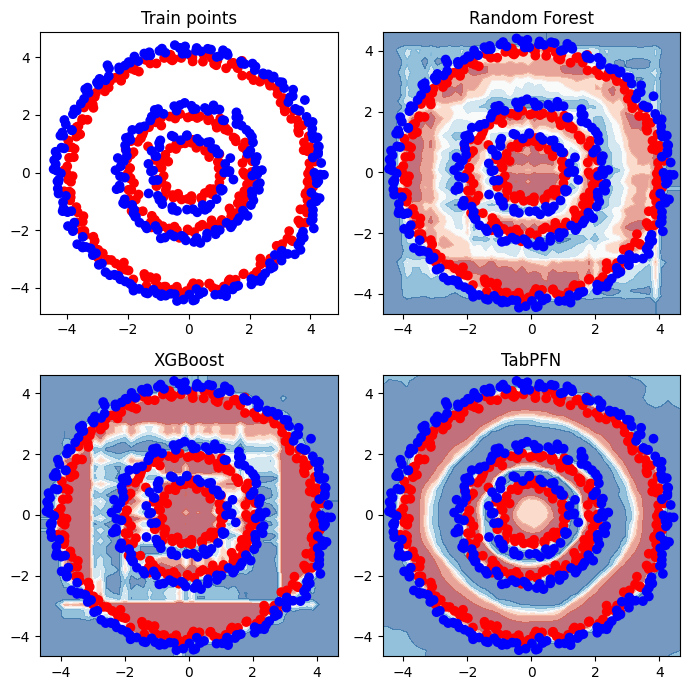

In [21]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Sin Curve Fitting with Regression

Next, we investigate the curve-fitting behavior of the different models on a sin curve.

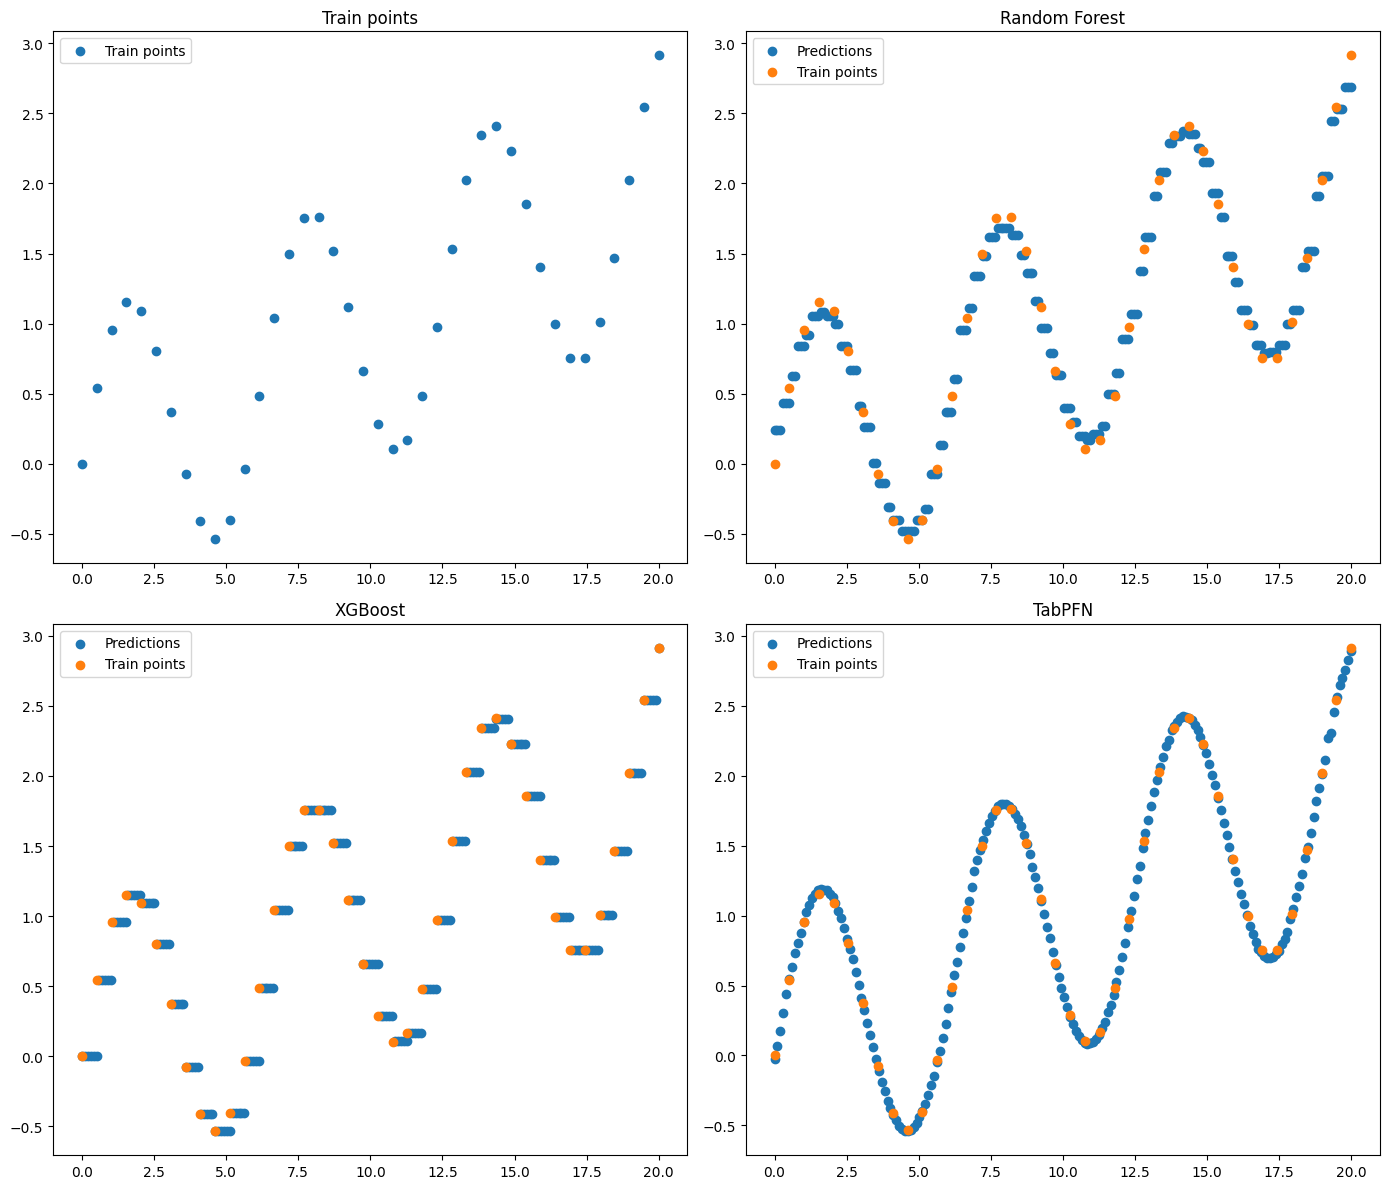

In [22]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Uncertainty of TabPFN / Quantile Regresison

---



TabPFN is trained to predict the distribution of the target variable and not just a single point. This is also the case for regression.

As a result, we natively obtain uncertainty for the predictions of TabPFN (without the need for a new model or repeating models for different quantiles).

In the following, we plot the uncertainty of TabPFN for a toy function with noise.

In [23]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [24]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

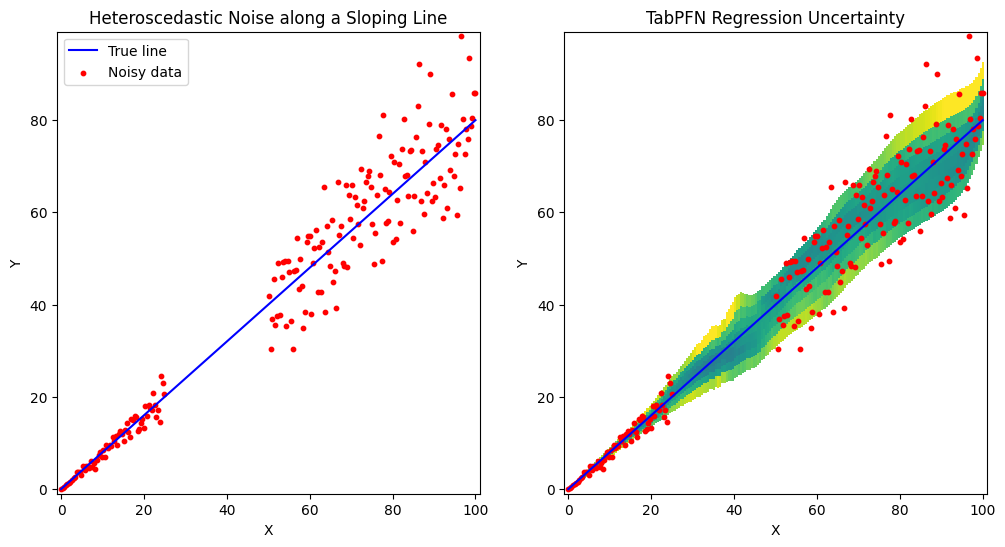

In [25]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)

## BATMAN

Na na na na

na na na na

na na na na na

Batman

File ‘thebat.npy’ already there; not retrieving.



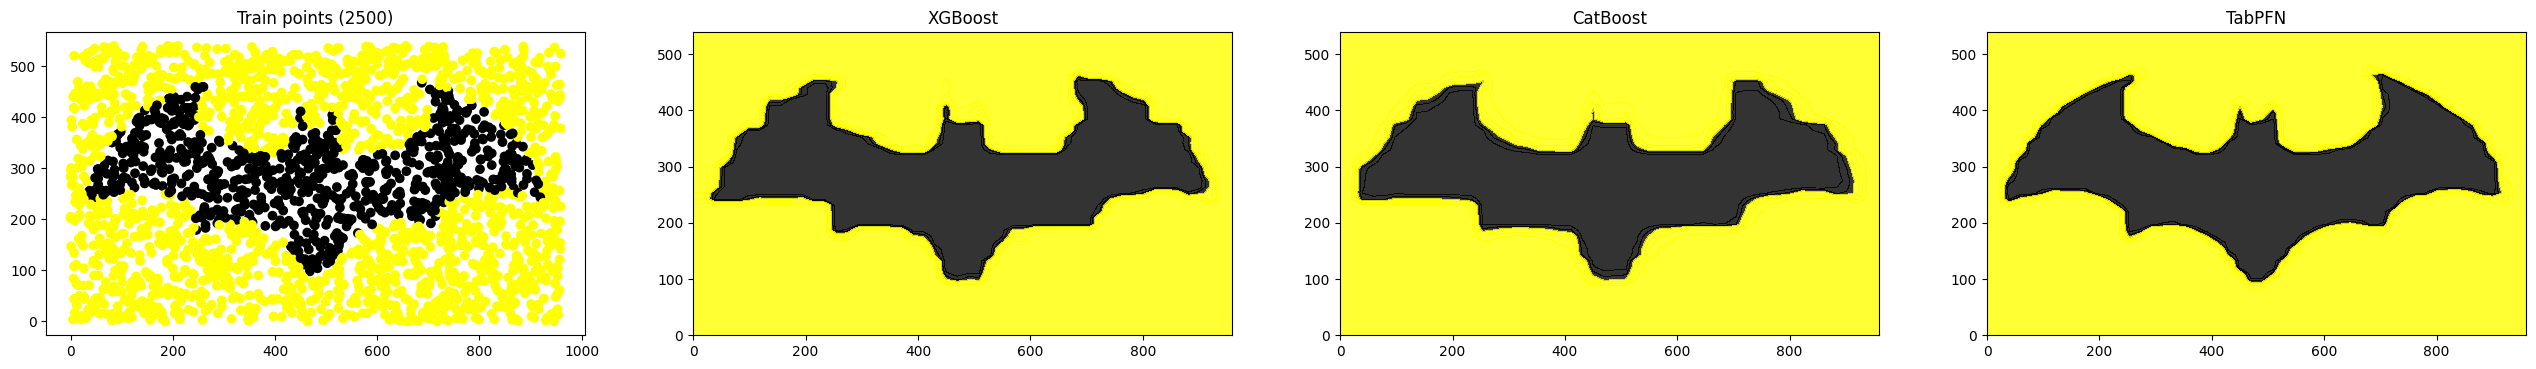

In [26]:
# "Just run this, no questions" - Batman
!wget -nc https://github.com/PriorLabs/TabPFNDemoFiles/raw/main/thebat.npy # download a file we need

def sample_random_points(n, array, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, array.shape[1], (n,)), np.random.randint(0, array.shape[0], (n,))
    return np.vstack((x, y)).T, array[y, x].reshape(-1, 1).flatten()

def plot_for_all_models(n_train_points, data_source="thebat.npy", random_state=9001):
    # Load the data
    data_array = np.load(data_source)
    X_train, y_train = sample_random_points(n_train_points, data_array, random_state)

    # Fit models
    xgb = XGBClassifier(random_state=42).fit(X_train, y_train)
    catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)
    tabpfn = TabPFNClassifier()
    tabpfn.fit(X_train, y_train)

    ####### PLOTTING  #######
    cmap = ListedColormap(["black", "yellow"])
    def plot_decision_boundary(ax, model, model_name):
        ax.set_title(model_name)
        ax.set_aspect("equal")
        DecisionBoundaryDisplay.from_estimator(
            model, X_train, alpha=0.8, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=cmap
        )
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

    fig = plt.figure(figsize=(32,8))

    ### Plot Train Points ###
    ax_points = fig.add_subplot(141)
    ax_points.set_title(f"Train points ({n_train_points})")
    ax_points.set_aspect("equal")
    ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

    ### Plot XGBoost ###
    ax_xgb = fig.add_subplot(142)
    plot_decision_boundary(ax_xgb, xgb, "XGBoost")

    ### Plot Random Forest ###
    ax_catboost = fig.add_subplot(143)
    plot_decision_boundary(ax_catboost, catboost, "CatBoost")

    ### Plot TabPFN ###
    ax_tabpfn = fig.add_subplot(144)
    plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

plot_for_all_models(n_train_points=2500, data_source="thebat.npy", random_state=9001)

## Random Search

In [27]:
from tabpfn_extensions.hpo import (
    TunedTabPFNRegressor,
    TunedTabPFNClassifier,
)

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

# Multiclass
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities, multi_class="ovr"))
print("Accuracy", accuracy_score(y_test, predictions))

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = TunedTabPFNRegressor()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

2025-01-16 21:05:14 INFO     No categorical features specified. Using all features as numeric.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-16 21:05:14 INFO     build_posterior_wrapper took 0.019363 seconds
2025-01-16 21:05:14 INFO     TPE using 0 trials


  2%|▏         | 1/50 [00:08<07:06,  8.70s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:23 INFO     build_posterior_wrapper took 0.023935 seconds
2025-01-16 21:05:23 INFO     TPE using 1/1 trials with best loss -0.987013


  4%|▍         | 2/50 [00:15<05:49,  7.29s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:30 INFO     build_posterior_wrapper took 0.262390 seconds
2025-01-16 21:05:30 INFO     TPE using 2/2 trials with best loss -0.987013


  6%|▌         | 3/50 [00:19<04:53,  6.24s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:34 INFO     build_posterior_wrapper took 0.022618 seconds
2025-01-16 21:05:34 INFO     TPE using 3/3 trials with best loss -0.987013
2025-01-16 21:05:34 INFO     build_posterior_wrapper took 0.024265 seconds
2025-01-16 21:05:34 INFO     TPE using 4/4 trials with best loss -0.987013
2025-01-16 21:05:34 INFO     build_posterior_wrapper took 0.022048 seconds
2025-01-16 21:05:34 INFO     TPE using 5/5 trials with best loss -0.987013


 12%|█▏        | 6/50 [00:22<01:58,  2.70s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:37 INFO     build_posterior_wrapper took 0.022254 seconds
2025-01-16 21:05:37 INFO     TPE using 6/6 trials with best loss -0.987013


 14%|█▍        | 7/50 [00:27<02:23,  3.33s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:42 INFO     build_posterior_wrapper took 0.023532 seconds
2025-01-16 21:05:42 INFO     TPE using 7/7 trials with best loss -0.987013


 16%|█▌        | 8/50 [00:32<02:32,  3.64s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:47 INFO     build_posterior_wrapper took 0.020519 seconds
2025-01-16 21:05:47 INFO     TPE using 8/8 trials with best loss -0.987013
2025-01-16 21:05:47 INFO     build_posterior_wrapper took 0.022910 seconds
2025-01-16 21:05:47 INFO     TPE using 9/9 trials with best loss -0.987013
2025-01-16 21:05:47 INFO     build_posterior_wrapper took 0.021405 seconds
2025-01-16 21:05:47 INFO     TPE using 10/10 trials with best loss -0.987013


 22%|██▏       | 11/50 [00:36<01:32,  2.38s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:51 INFO     build_posterior_wrapper took 0.227008 seconds
2025-01-16 21:05:51 INFO     TPE using 11/11 trials with best loss -0.987013


 24%|██▍       | 12/50 [00:40<01:48,  2.86s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:55 INFO     build_posterior_wrapper took 0.019515 seconds
2025-01-16 21:05:55 INFO     TPE using 12/12 trials with best loss -0.987013


 26%|██▌       | 13/50 [00:42<01:36,  2.62s/trial, best loss: -0.987012987012987]

2025-01-16 21:05:57 INFO     build_posterior_wrapper took 0.022342 seconds
2025-01-16 21:05:57 INFO     TPE using 13/13 trials with best loss -0.987013
2025-01-16 21:05:57 INFO     build_posterior_wrapper took 0.018560 seconds
2025-01-16 21:05:57 INFO     TPE using 14/14 trials with best loss -0.987013
2025-01-16 21:05:57 INFO     build_posterior_wrapper took 0.024348 seconds
2025-01-16 21:05:57 INFO     TPE using 15/15 trials with best loss -0.987013


 32%|███▏      | 16/50 [00:45<00:59,  1.76s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:00 INFO     build_posterior_wrapper took 0.021904 seconds
2025-01-16 21:06:00 INFO     TPE using 16/16 trials with best loss -0.987013


 34%|███▍      | 17/50 [00:47<01:02,  1.89s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:02 INFO     build_posterior_wrapper took 0.022852 seconds
2025-01-16 21:06:02 INFO     TPE using 17/17 trials with best loss -0.987013
2025-01-16 21:06:02 INFO     build_posterior_wrapper took 0.020836 seconds
2025-01-16 21:06:02 INFO     TPE using 18/18 trials with best loss -0.987013


 38%|███▊      | 19/50 [00:49<00:48,  1.55s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:04 INFO     build_posterior_wrapper took 0.025836 seconds
2025-01-16 21:06:04 INFO     TPE using 19/19 trials with best loss -0.987013


 40%|████      | 20/50 [00:56<01:20,  2.68s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:11 INFO     build_posterior_wrapper took 0.216686 seconds
2025-01-16 21:06:11 INFO     TPE using 20/20 trials with best loss -0.987013


 42%|████▏     | 21/50 [01:03<01:41,  3.50s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:18 INFO     build_posterior_wrapper took 0.022536 seconds
2025-01-16 21:06:18 INFO     TPE using 21/21 trials with best loss -0.987013


 44%|████▍     | 22/50 [01:10<02:05,  4.47s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:25 INFO     build_posterior_wrapper took 0.021636 seconds
2025-01-16 21:06:25 INFO     TPE using 22/22 trials with best loss -0.987013


 46%|████▌     | 23/50 [01:19<02:31,  5.63s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:34 INFO     build_posterior_wrapper took 0.021973 seconds
2025-01-16 21:06:34 INFO     TPE using 23/23 trials with best loss -0.987013


 48%|████▊     | 24/50 [01:22<02:09,  4.99s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:37 INFO     build_posterior_wrapper took 0.023608 seconds
2025-01-16 21:06:37 INFO     TPE using 24/24 trials with best loss -0.987013


 50%|█████     | 25/50 [01:30<02:23,  5.73s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:45 INFO     build_posterior_wrapper took 0.021377 seconds
2025-01-16 21:06:45 INFO     TPE using 25/25 trials with best loss -0.987013


 52%|█████▏    | 26/50 [01:37<02:22,  5.92s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:51 INFO     build_posterior_wrapper took 0.023112 seconds
2025-01-16 21:06:51 INFO     TPE using 26/26 trials with best loss -0.987013


 54%|█████▍    | 27/50 [01:40<01:58,  5.15s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:55 INFO     build_posterior_wrapper took 0.021328 seconds
2025-01-16 21:06:55 INFO     TPE using 27/27 trials with best loss -0.987013


 56%|█████▌    | 28/50 [01:43<01:43,  4.69s/trial, best loss: -0.987012987012987]

2025-01-16 21:06:58 INFO     build_posterior_wrapper took 0.022406 seconds
2025-01-16 21:06:58 INFO     TPE using 28/28 trials with best loss -0.987013


 58%|█████▊    | 29/50 [01:48<01:40,  4.77s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:03 INFO     build_posterior_wrapper took 0.226102 seconds
2025-01-16 21:07:03 INFO     TPE using 29/29 trials with best loss -0.987013


 60%|██████    | 30/50 [01:55<01:45,  5.26s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:10 INFO     build_posterior_wrapper took 0.022040 seconds
2025-01-16 21:07:10 INFO     TPE using 30/30 trials with best loss -0.987013


 62%|██████▏   | 31/50 [02:02<01:50,  5.84s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:17 INFO     build_posterior_wrapper took 0.020806 seconds
2025-01-16 21:07:17 INFO     TPE using 31/31 trials with best loss -0.987013
2025-01-16 21:07:17 INFO     build_posterior_wrapper took 0.020733 seconds
2025-01-16 21:07:17 INFO     TPE using 32/32 trials with best loss -0.987013


 66%|██████▌   | 33/50 [02:06<01:11,  4.19s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:21 INFO     build_posterior_wrapper took 0.021785 seconds
2025-01-16 21:07:21 INFO     TPE using 33/33 trials with best loss -0.987013


 68%|██████▊   | 34/50 [02:11<01:09,  4.31s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:26 INFO     build_posterior_wrapper took 0.022425 seconds
2025-01-16 21:07:26 INFO     TPE using 34/34 trials with best loss -0.987013
2025-01-16 21:07:26 INFO     build_posterior_wrapper took 0.021271 seconds
2025-01-16 21:07:26 INFO     TPE using 35/35 trials with best loss -0.987013


 72%|███████▏  | 36/50 [02:15<00:47,  3.43s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:30 INFO     build_posterior_wrapper took 0.022631 seconds
2025-01-16 21:07:30 INFO     TPE using 36/36 trials with best loss -0.987013


 74%|███████▍  | 37/50 [02:24<00:59,  4.61s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:39 INFO     build_posterior_wrapper took 0.020324 seconds
2025-01-16 21:07:39 INFO     TPE using 37/37 trials with best loss -0.987013
2025-01-16 21:07:39 INFO     build_posterior_wrapper took 0.230299 seconds
2025-01-16 21:07:39 INFO     TPE using 38/38 trials with best loss -0.987013


 78%|███████▊  | 39/50 [02:29<00:41,  3.79s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:44 INFO     build_posterior_wrapper took 0.022414 seconds
2025-01-16 21:07:44 INFO     TPE using 39/39 trials with best loss -0.987013


 80%|████████  | 40/50 [02:31<00:34,  3.46s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:46 INFO     build_posterior_wrapper took 0.021925 seconds
2025-01-16 21:07:46 INFO     TPE using 40/40 trials with best loss -0.987013
2025-01-16 21:07:46 INFO     build_posterior_wrapper took 0.021194 seconds
2025-01-16 21:07:46 INFO     TPE using 41/41 trials with best loss -0.987013


 84%|████████▍ | 42/50 [02:34<00:20,  2.57s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:49 INFO     build_posterior_wrapper took 0.021169 seconds
2025-01-16 21:07:49 INFO     TPE using 42/42 trials with best loss -0.987013


 86%|████████▌ | 43/50 [02:39<00:21,  3.10s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:54 INFO     build_posterior_wrapper took 0.020355 seconds
2025-01-16 21:07:54 INFO     TPE using 43/43 trials with best loss -0.987013
2025-01-16 21:07:54 INFO     build_posterior_wrapper took 0.019595 seconds
2025-01-16 21:07:54 INFO     TPE using 44/44 trials with best loss -0.987013


 90%|█████████ | 45/50 [02:41<00:12,  2.43s/trial, best loss: -0.987012987012987]

2025-01-16 21:07:56 INFO     build_posterior_wrapper took 0.023305 seconds
2025-01-16 21:07:56 INFO     TPE using 45/45 trials with best loss -0.987013


 92%|█████████▏| 46/50 [02:50<00:14,  3.64s/trial, best loss: -0.987012987012987]

2025-01-16 21:08:04 INFO     build_posterior_wrapper took 0.021070 seconds
2025-01-16 21:08:04 INFO     TPE using 46/46 trials with best loss -0.987013
2025-01-16 21:08:04 INFO     build_posterior_wrapper took 0.018211 seconds
2025-01-16 21:08:04 INFO     TPE using 47/47 trials with best loss -0.987013


 96%|█████████▌| 48/50 [02:56<00:07,  3.51s/trial, best loss: -0.987012987012987]

2025-01-16 21:08:11 INFO     build_posterior_wrapper took 0.233134 seconds
2025-01-16 21:08:11 INFO     TPE using 48/48 trials with best loss -0.987013


 98%|█████████▊| 49/50 [03:03<00:04,  4.31s/trial, best loss: -0.987012987012987]

2025-01-16 21:08:18 INFO     build_posterior_wrapper took 0.023223 seconds
2025-01-16 21:08:18 INFO     TPE using 49/49 trials with best loss -0.987013


100%|██████████| 50/50 [03:06<00:00,  3.74s/trial, best loss: -0.987012987012987]


2025-01-16 21:08:32 INFO     No categorical features specified. Using all features as numeric.


ROC AUC: 0.9960527938818305
Accuracy 0.973404255319149
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.022644 seconds
2025-01-16 21:08:32 INFO     TPE using 0 trials
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.020049 seconds
2025-01-16 21:08:32 INFO     TPE using 1/1 trials with best loss inf
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.021060 seconds
2025-01-16 21:08:32 INFO     TPE using 2/2 trials with best loss inf
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.019405 seconds
2025-01-16 21:08:32 INFO     TPE using 3/3 trials with best loss inf
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.019637 seconds
2025-01-16 21:08:32 INFO     TPE using 4/4 trials with best loss inf


 10%|█         | 5/50 [00:00<00:01, 41.12trial/s, best loss: inf]

2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.019636 seconds
2025-01-16 21:08:32 INFO     TPE using 5/5 trials with best loss inf
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.213767 seconds
2025-01-16 21:08:32 INFO     TPE using 6/6 trials with best loss inf
2025-01-16 21:08:32 INFO     build_posterior_wrapper took 0.018800 seconds
2025-01-16 21:08:32 INFO     TPE using 7/7 trials with best loss inf
2025-01-16 21:08:33 INFO     build_posterior_wrapper took 0.021532 seconds
2025-01-16 21:08:33 INFO     TPE using 8/8 trials with best loss -0.950000
2025-01-16 21:08:33 INFO     build_posterior_wrapper took 0.019361 seconds
2025-01-16 21:08:33 INFO     TPE using 9/9 trials with best loss -0.950000


 20%|██        | 10/50 [00:00<00:03, 10.28trial/s, best loss: -0.95]

2025-01-16 21:08:33 INFO     build_posterior_wrapper took 0.020336 seconds
2025-01-16 21:08:33 INFO     TPE using 10/10 trials with best loss -0.950000
2025-01-16 21:08:33 INFO     build_posterior_wrapper took 0.020820 seconds
2025-01-16 21:08:33 INFO     TPE using 11/11 trials with best loss -1.000000
2025-01-16 21:08:33 INFO     build_posterior_wrapper took 0.020671 seconds
2025-01-16 21:08:33 INFO     TPE using 12/12 trials with best loss -1.000000


 26%|██▌       | 13/50 [00:02<00:07,  4.67trial/s, best loss: -1.0] 

2025-01-16 21:08:34 INFO     build_posterior_wrapper took 0.022178 seconds
2025-01-16 21:08:34 INFO     TPE using 13/13 trials with best loss -1.000000
2025-01-16 21:08:34 INFO     build_posterior_wrapper took 0.020609 seconds
2025-01-16 21:08:34 INFO     TPE using 14/14 trials with best loss -1.000000


 30%|███       | 15/50 [00:02<00:07,  4.49trial/s, best loss: -1.0]

2025-01-16 21:08:34 INFO     build_posterior_wrapper took 0.019283 seconds
2025-01-16 21:08:34 INFO     TPE using 15/15 trials with best loss -1.000000
2025-01-16 21:08:35 INFO     build_posterior_wrapper took 0.214472 seconds
2025-01-16 21:08:35 INFO     TPE using 16/16 trials with best loss -1.000000


 34%|███▍      | 17/50 [00:03<00:10,  3.21trial/s, best loss: -1.0]

2025-01-16 21:08:36 INFO     build_posterior_wrapper took 0.023737 seconds
2025-01-16 21:08:36 INFO     TPE using 17/17 trials with best loss -1.000000
2025-01-16 21:08:36 INFO     build_posterior_wrapper took 0.021763 seconds
2025-01-16 21:08:36 INFO     TPE using 18/18 trials with best loss -1.000000


 38%|███▊      | 19/50 [00:04<00:11,  2.81trial/s, best loss: -1.0]

2025-01-16 21:08:37 INFO     build_posterior_wrapper took 0.022934 seconds
2025-01-16 21:08:37 INFO     TPE using 19/19 trials with best loss -1.000000
2025-01-16 21:08:37 INFO     build_posterior_wrapper took 0.022760 seconds
2025-01-16 21:08:37 INFO     TPE using 20/20 trials with best loss -1.000000


 42%|████▏     | 21/50 [00:05<00:09,  3.08trial/s, best loss: -1.0]

2025-01-16 21:08:37 INFO     build_posterior_wrapper took 0.024136 seconds
2025-01-16 21:08:37 INFO     TPE using 21/21 trials with best loss -1.000000


 44%|████▍     | 22/50 [00:05<00:09,  2.89trial/s, best loss: -1.0]

2025-01-16 21:08:38 INFO     build_posterior_wrapper took 0.024191 seconds
2025-01-16 21:08:38 INFO     TPE using 22/22 trials with best loss -1.000000


 46%|████▌     | 23/50 [00:06<00:09,  2.75trial/s, best loss: -1.0]

2025-01-16 21:08:38 INFO     build_posterior_wrapper took 0.022825 seconds
2025-01-16 21:08:38 INFO     TPE using 23/23 trials with best loss -1.000000


 48%|████▊     | 24/50 [00:06<00:10,  2.43trial/s, best loss: -1.0]

2025-01-16 21:08:39 INFO     build_posterior_wrapper took 0.021453 seconds
2025-01-16 21:08:39 INFO     TPE using 24/24 trials with best loss -1.000000


 50%|█████     | 25/50 [00:07<00:11,  2.16trial/s, best loss: -1.0]

2025-01-16 21:08:39 INFO     build_posterior_wrapper took 0.222756 seconds
2025-01-16 21:08:39 INFO     TPE using 25/25 trials with best loss -1.000000


 52%|█████▏    | 26/50 [00:08<00:12,  1.93trial/s, best loss: -1.0]

2025-01-16 21:08:40 INFO     build_posterior_wrapper took 0.024258 seconds
2025-01-16 21:08:40 INFO     TPE using 26/26 trials with best loss -1.000000


 54%|█████▍    | 27/50 [00:08<00:10,  2.10trial/s, best loss: -1.0]

2025-01-16 21:08:40 INFO     build_posterior_wrapper took 0.023736 seconds
2025-01-16 21:08:40 INFO     TPE using 27/27 trials with best loss -1.000000


 56%|█████▌    | 28/50 [00:09<00:11,  1.90trial/s, best loss: -1.0]

2025-01-16 21:08:41 INFO     build_posterior_wrapper took 0.025090 seconds
2025-01-16 21:08:41 INFO     TPE using 28/28 trials with best loss -1.000000


 58%|█████▊    | 29/50 [00:09<00:10,  1.98trial/s, best loss: -1.0]

2025-01-16 21:08:41 INFO     build_posterior_wrapper took 0.026789 seconds
2025-01-16 21:08:41 INFO     TPE using 29/29 trials with best loss -1.000000


 60%|██████    | 30/50 [00:10<00:11,  1.80trial/s, best loss: -1.0]

2025-01-16 21:08:42 INFO     build_posterior_wrapper took 0.024149 seconds
2025-01-16 21:08:42 INFO     TPE using 30/30 trials with best loss -1.000000


 62%|██████▏   | 31/50 [00:10<00:10,  1.85trial/s, best loss: -1.0]

2025-01-16 21:08:43 INFO     build_posterior_wrapper took 0.023215 seconds
2025-01-16 21:08:43 INFO     TPE using 31/31 trials with best loss -1.000000


 64%|██████▍   | 32/50 [00:11<00:08,  2.04trial/s, best loss: -1.0]

2025-01-16 21:08:43 INFO     build_posterior_wrapper took 0.022329 seconds
2025-01-16 21:08:43 INFO     TPE using 32/32 trials with best loss -1.000000


 66%|██████▌   | 33/50 [00:11<00:10,  1.64trial/s, best loss: -1.0]

2025-01-16 21:08:44 INFO     build_posterior_wrapper took 0.023345 seconds
2025-01-16 21:08:44 INFO     TPE using 33/33 trials with best loss -1.000000


 68%|██████▊   | 34/50 [00:12<00:08,  1.79trial/s, best loss: -1.0]

2025-01-16 21:08:44 INFO     build_posterior_wrapper took 0.228208 seconds
2025-01-16 21:08:44 INFO     TPE using 34/34 trials with best loss -1.000000


 70%|███████   | 35/50 [00:13<00:08,  1.71trial/s, best loss: -1.0]

2025-01-16 21:08:45 INFO     build_posterior_wrapper took 0.021218 seconds
2025-01-16 21:08:45 INFO     TPE using 35/35 trials with best loss -1.000000


 72%|███████▏  | 36/50 [00:13<00:09,  1.53trial/s, best loss: -1.0]

2025-01-16 21:08:46 INFO     build_posterior_wrapper took 0.023459 seconds
2025-01-16 21:08:46 INFO     TPE using 36/36 trials with best loss -1.000000


 74%|███████▍  | 37/50 [00:14<00:08,  1.56trial/s, best loss: -1.0]

2025-01-16 21:08:46 INFO     build_posterior_wrapper took 0.020736 seconds
2025-01-16 21:08:46 INFO     TPE using 37/37 trials with best loss -1.000000


 76%|███████▌  | 38/50 [00:14<00:07,  1.71trial/s, best loss: -1.0]

2025-01-16 21:08:47 INFO     build_posterior_wrapper took 0.023373 seconds
2025-01-16 21:08:47 INFO     TPE using 38/38 trials with best loss -1.000000


 78%|███████▊  | 39/50 [00:15<00:07,  1.54trial/s, best loss: -1.0]

2025-01-16 21:08:48 INFO     build_posterior_wrapper took 0.025967 seconds
2025-01-16 21:08:48 INFO     TPE using 39/39 trials with best loss -1.000000


 80%|████████  | 40/50 [00:16<00:05,  1.70trial/s, best loss: -1.0]

2025-01-16 21:08:48 INFO     build_posterior_wrapper took 0.024381 seconds
2025-01-16 21:08:48 INFO     TPE using 40/40 trials with best loss -1.000000


 82%|████████▏ | 41/50 [00:17<00:06,  1.49trial/s, best loss: -1.0]

2025-01-16 21:08:49 INFO     build_posterior_wrapper took 0.022951 seconds
2025-01-16 21:08:49 INFO     TPE using 41/41 trials with best loss -1.000000


 84%|████████▍ | 42/50 [00:17<00:04,  1.67trial/s, best loss: -1.0]

2025-01-16 21:08:49 INFO     build_posterior_wrapper took 0.237066 seconds
2025-01-16 21:08:49 INFO     TPE using 42/42 trials with best loss -1.000000


 86%|████████▌ | 43/50 [00:17<00:03,  2.03trial/s, best loss: -1.0]

2025-01-16 21:08:50 INFO     build_posterior_wrapper took 0.020810 seconds
2025-01-16 21:08:50 INFO     TPE using 43/43 trials with best loss -1.000000


 88%|████████▊ | 44/50 [00:18<00:02,  2.12trial/s, best loss: -1.0]

2025-01-16 21:08:50 INFO     build_posterior_wrapper took 0.020969 seconds
2025-01-16 21:08:50 INFO     TPE using 44/44 trials with best loss -1.000000
2025-01-16 21:08:50 INFO     build_posterior_wrapper took 0.021031 seconds
2025-01-16 21:08:50 INFO     TPE using 45/45 trials with best loss -1.000000


 92%|█████████▏| 46/50 [00:18<00:01,  2.74trial/s, best loss: -1.0]

2025-01-16 21:08:50 INFO     build_posterior_wrapper took 0.022806 seconds
2025-01-16 21:08:50 INFO     TPE using 46/46 trials with best loss -1.000000


 94%|█████████▍| 47/50 [00:19<00:01,  2.37trial/s, best loss: -1.0]

2025-01-16 21:08:51 INFO     build_posterior_wrapper took 0.023042 seconds
2025-01-16 21:08:51 INFO     TPE using 47/47 trials with best loss -1.000000
2025-01-16 21:08:51 INFO     build_posterior_wrapper took 0.021257 seconds
2025-01-16 21:08:51 INFO     TPE using 48/48 trials with best loss -1.000000


 98%|█████████▊| 49/50 [00:19<00:00,  2.92trial/s, best loss: -1.0]

2025-01-16 21:08:51 INFO     build_posterior_wrapper took 0.022542 seconds
2025-01-16 21:08:51 INFO     TPE using 49/49 trials with best loss -1.000000


100%|██████████| 50/50 [00:19<00:00,  2.54trial/s, best loss: -1.0]


2025-01-16 21:08:52 INFO     No categorical features specified. Using all features as numeric.


ROC AUC: 0.99875233426704
Accuracy 0.98
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-16 21:08:52 INFO     build_posterior_wrapper took 0.223229 seconds
2025-01-16 21:08:52 INFO     TPE using 0 trials


  2%|▏         | 1/50 [00:00<00:11,  4.40trial/s, best loss: inf]

2025-01-16 21:08:52 INFO     build_posterior_wrapper took 0.023229 seconds
2025-01-16 21:08:52 INFO     TPE using 1/1 trials with best loss inf
2025-01-16 21:08:52 INFO     build_posterior_wrapper took 0.022136 seconds
2025-01-16 21:08:52 INFO     TPE using 2/2 trials with best loss inf
2025-01-16 21:08:52 INFO     build_posterior_wrapper took 0.021070 seconds
2025-01-16 21:08:52 INFO     TPE using 3/3 trials with best loss inf
2025-01-16 21:08:53 INFO     build_posterior_wrapper took 0.019169 seconds
2025-01-16 21:08:53 INFO     TPE using 4/4 trials with best loss inf


 10%|█         | 5/50 [00:00<00:02, 17.91trial/s, best loss: inf]

2025-01-16 21:08:53 INFO     build_posterior_wrapper took 0.022508 seconds
2025-01-16 21:08:53 INFO     TPE using 5/5 trials with best loss inf
2025-01-16 21:08:53 INFO     build_posterior_wrapper took 0.022256 seconds
2025-01-16 21:08:53 INFO     TPE using 6/6 trials with best loss inf
2025-01-16 21:08:53 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-16 21:08:53 INFO     build_posterior_wrapper took 0.022076 seconds
2025-01-16 21:08:53 INFO     TPE using 7/7 trials with best loss inf


 16%|█▌        | 8/50 [00:01<00:06,  6.86trial/s, best loss: inf]

2025-01-16 21:08:53 INFO     build_posterior_wrapper took 0.023368 seconds
2025-01-16 21:08:53 INFO     TPE using 8/8 trials with best loss inf
2025-01-16 21:08:56 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value
2025-01-16 21:08:56 INFO     build_posterior_wrapper took 0.023876 seconds
2025-01-16 21:08:56 INFO     TPE using 9/9 trials with best loss inf
2025-01-16 21:08:57 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 20%|██        | 10/50 [00:04<00:26,  1.51trial/s, best loss: inf]

2025-01-16 21:08:57 INFO     build_posterior_wrapper took 0.223654 seconds
2025-01-16 21:08:57 INFO     TPE using 10/10 trials with best loss inf
2025-01-16 21:09:00 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 22%|██▏       | 11/50 [00:08<00:45,  1.16s/trial, best loss: inf]

2025-01-16 21:09:00 INFO     build_posterior_wrapper took 0.026057 seconds
2025-01-16 21:09:00 INFO     TPE using 11/11 trials with best loss inf
2025-01-16 21:09:00 INFO     build_posterior_wrapper took 0.020800 seconds
2025-01-16 21:09:00 INFO     TPE using 12/12 trials with best loss inf
2025-01-16 21:09:02 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 26%|██▌       | 13/50 [00:09<00:37,  1.02s/trial, best loss: inf]

2025-01-16 21:09:02 INFO     build_posterior_wrapper took 0.025380 seconds
2025-01-16 21:09:02 INFO     TPE using 13/13 trials with best loss inf
2025-01-16 21:09:03 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 28%|██▊       | 14/50 [00:10<00:39,  1.10s/trial, best loss: inf]

2025-01-16 21:09:03 INFO     build_posterior_wrapper took 0.025130 seconds
2025-01-16 21:09:03 INFO     TPE using 14/14 trials with best loss inf
2025-01-16 21:09:03 INFO     build_posterior_wrapper took 0.024342 seconds
2025-01-16 21:09:03 INFO     TPE using 15/15 trials with best loss inf
2025-01-16 21:09:05 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 32%|███▏      | 16/50 [00:12<00:32,  1.05trial/s, best loss: inf]

2025-01-16 21:09:05 INFO     build_posterior_wrapper took 0.022793 seconds
2025-01-16 21:09:05 INFO     TPE using 16/16 trials with best loss inf
2025-01-16 21:09:06 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 34%|███▍      | 17/50 [00:13<00:35,  1.07s/trial, best loss: inf]

2025-01-16 21:09:06 INFO     build_posterior_wrapper took 0.024913 seconds
2025-01-16 21:09:06 INFO     TPE using 17/17 trials with best loss inf
2025-01-16 21:09:06 INFO     build_posterior_wrapper took 0.023287 seconds
2025-01-16 21:09:06 INFO     TPE using 18/18 trials with best loss inf
2025-01-16 21:09:06 INFO     build_posterior_wrapper took 0.023307 seconds
2025-01-16 21:09:06 INFO     TPE using 19/19 trials with best loss inf


 40%|████      | 20/50 [00:14<00:18,  1.59trial/s, best loss: inf]

2025-01-16 21:09:06 INFO     build_posterior_wrapper took 0.022527 seconds
2025-01-16 21:09:06 INFO     TPE using 20/20 trials with best loss inf
2025-01-16 21:09:06 INFO     build_posterior_wrapper took 0.023935 seconds
2025-01-16 21:09:06 INFO     TPE using 21/21 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021643 seconds
2025-01-16 21:09:07 INFO     TPE using 22/22 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021296 seconds
2025-01-16 21:09:07 INFO     TPE using 23/23 trials with best loss inf


 48%|████▊     | 24/50 [00:14<00:09,  2.89trial/s, best loss: inf]

2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021872 seconds
2025-01-16 21:09:07 INFO     TPE using 24/24 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.022741 seconds
2025-01-16 21:09:07 INFO     TPE using 25/25 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.020318 seconds
2025-01-16 21:09:07 INFO     TPE using 26/26 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021026 seconds
2025-01-16 21:09:07 INFO     TPE using 27/27 trials with best loss inf


 56%|█████▌    | 28/50 [00:14<00:04,  4.58trial/s, best loss: inf]

2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021436 seconds
2025-01-16 21:09:07 INFO     TPE using 28/28 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.219147 seconds
2025-01-16 21:09:07 INFO     TPE using 29/29 trials with best loss inf


 60%|██████    | 30/50 [00:14<00:03,  5.04trial/s, best loss: inf]

2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.019874 seconds
2025-01-16 21:09:07 INFO     TPE using 30/30 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.023931 seconds
2025-01-16 21:09:07 INFO     TPE using 31/31 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.023921 seconds
2025-01-16 21:09:07 INFO     TPE using 32/32 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.023539 seconds
2025-01-16 21:09:07 INFO     TPE using 33/33 trials with best loss inf


 68%|██████▊   | 34/50 [00:14<00:02,  7.53trial/s, best loss: inf]

2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.019519 seconds
2025-01-16 21:09:07 INFO     TPE using 34/34 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.021067 seconds
2025-01-16 21:09:07 INFO     TPE using 35/35 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.025063 seconds
2025-01-16 21:09:07 INFO     TPE using 36/36 trials with best loss inf
2025-01-16 21:09:07 INFO     build_posterior_wrapper took 0.022637 seconds
2025-01-16 21:09:07 INFO     TPE using 37/37 trials with best loss inf
2025-01-16 21:09:09 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 76%|███████▌  | 38/50 [00:16<00:02,  4.16trial/s, best loss: inf]

2025-01-16 21:09:09 INFO     build_posterior_wrapper took 0.227089 seconds
2025-01-16 21:09:09 INFO     TPE using 38/38 trials with best loss inf
2025-01-16 21:09:09 INFO     build_posterior_wrapper took 0.019799 seconds
2025-01-16 21:09:09 INFO     TPE using 39/39 trials with best loss inf
2025-01-16 21:09:13 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 80%|████████  | 40/50 [00:20<00:05,  1.72trial/s, best loss: inf]

2025-01-16 21:09:13 INFO     build_posterior_wrapper took 0.024562 seconds
2025-01-16 21:09:13 INFO     TPE using 40/40 trials with best loss inf
2025-01-16 21:09:13 INFO     build_posterior_wrapper took 0.022421 seconds
2025-01-16 21:09:13 INFO     TPE using 41/41 trials with best loss inf
2025-01-16 21:09:13 INFO     build_posterior_wrapper took 0.021115 seconds
2025-01-16 21:09:13 INFO     TPE using 42/42 trials with best loss inf
2025-01-16 21:09:14 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 86%|████████▌ | 43/50 [00:21<00:03,  1.83trial/s, best loss: inf]

2025-01-16 21:09:14 INFO     build_posterior_wrapper took 0.023694 seconds
2025-01-16 21:09:14 INFO     TPE using 43/43 trials with best loss inf
2025-01-16 21:09:14 INFO     build_posterior_wrapper took 0.023597 seconds
2025-01-16 21:09:14 INFO     TPE using 44/44 trials with best loss inf
2025-01-16 21:09:19 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 90%|█████████ | 45/50 [00:26<00:04,  1.06trial/s, best loss: inf]

2025-01-16 21:09:19 INFO     build_posterior_wrapper took 0.026010 seconds
2025-01-16 21:09:19 INFO     TPE using 45/45 trials with best loss inf
2025-01-16 21:09:19 INFO     build_posterior_wrapper took 0.023544 seconds
2025-01-16 21:09:19 INFO     TPE using 46/46 trials with best loss inf
2025-01-16 21:09:20 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 94%|█████████▍| 47/50 [00:27<00:02,  1.14trial/s, best loss: inf]

2025-01-16 21:09:20 INFO     build_posterior_wrapper took 0.214945 seconds
2025-01-16 21:09:20 INFO     TPE using 47/47 trials with best loss inf


 96%|█████████▌| 48/50 [00:28<00:01,  1.28trial/s, best loss: inf]

2025-01-16 21:09:20 INFO     build_posterior_wrapper took 0.023173 seconds
2025-01-16 21:09:20 INFO     TPE using 48/48 trials with best loss inf
2025-01-16 21:09:20 INFO     build_posterior_wrapper took 0.022125 seconds
2025-01-16 21:09:20 INFO     TPE using 49/49 trials with best loss inf


100%|██████████| 50/50 [00:28<00:00,  1.78trial/s, best loss: inf]

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/tabpfn_extensions/hpo/tuned_tabpfn.py:295: UserWarning: All optimization trials failed. Creating default model.
  self._optimize(X, y, "regression")



Mean Squared Error (MSE): 2681.6454293109173
Mean Absolute Error (MAE): 40.890204599458876
R-squared (R^2): 0.5340531137556944


# Interpretability

## SHAP

PermutationExplainer explainer: 51it [00:55,  1.29s/it]                        

Computing shap values for the first class (index 0).


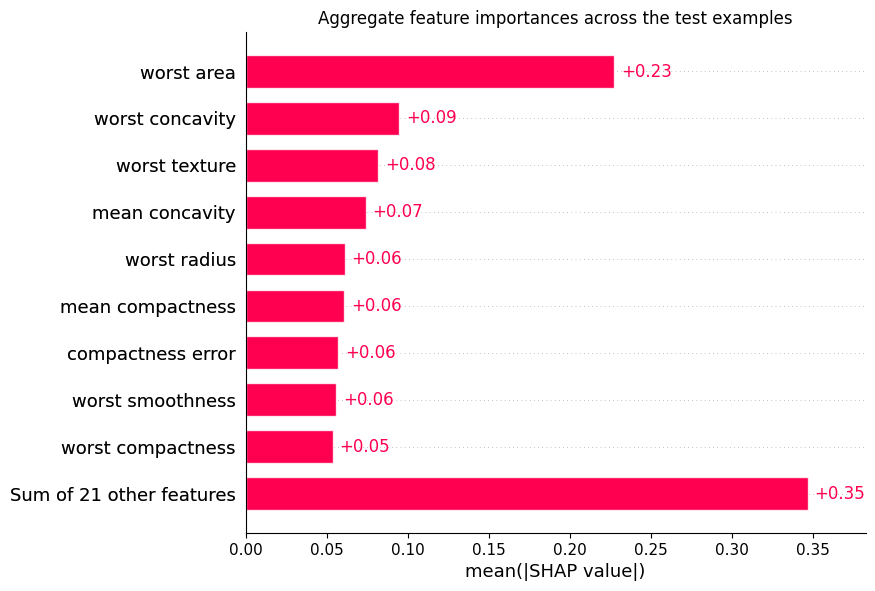

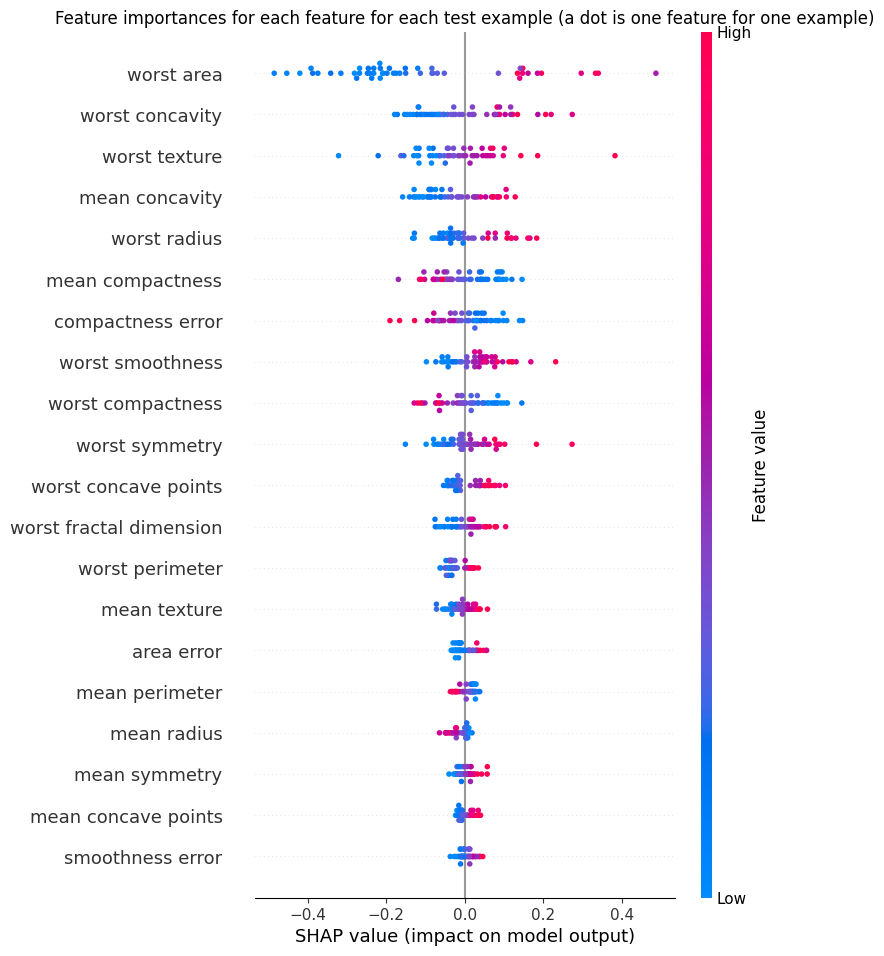

Now we analyze the strongest feature interactions of the most important feature, namely the feature "23".


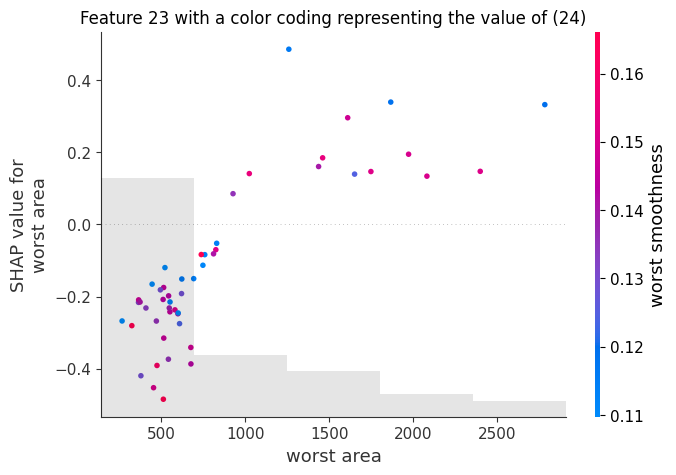

In [28]:
from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5
)

# Initialize and train model
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

# Create visualization
fig = interpretability.shap.plot_shap(shap_values)


## Feature selection

In [29]:
%%time
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

Score with all features: 0.9789007918025152 +/- 0.007053005000906204
Score with selected features: 0.9771464058376029 +/- 0.004336213979070391
Features selected by forward sequential selection: ['mean texture', 'mean concave points', 'worst perimeter', 'worst smoothness', 'worst concavity']

Selected features:
- mean texture
- mean concave points
- worst perimeter
- worst smoothness
- worst concavity
CPU times: user 5min 22s, sys: 10.1 s, total: 5min 32s
Wall time: 1min 35s


# Unsupervised

## Data Generation / Outlier Detection

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


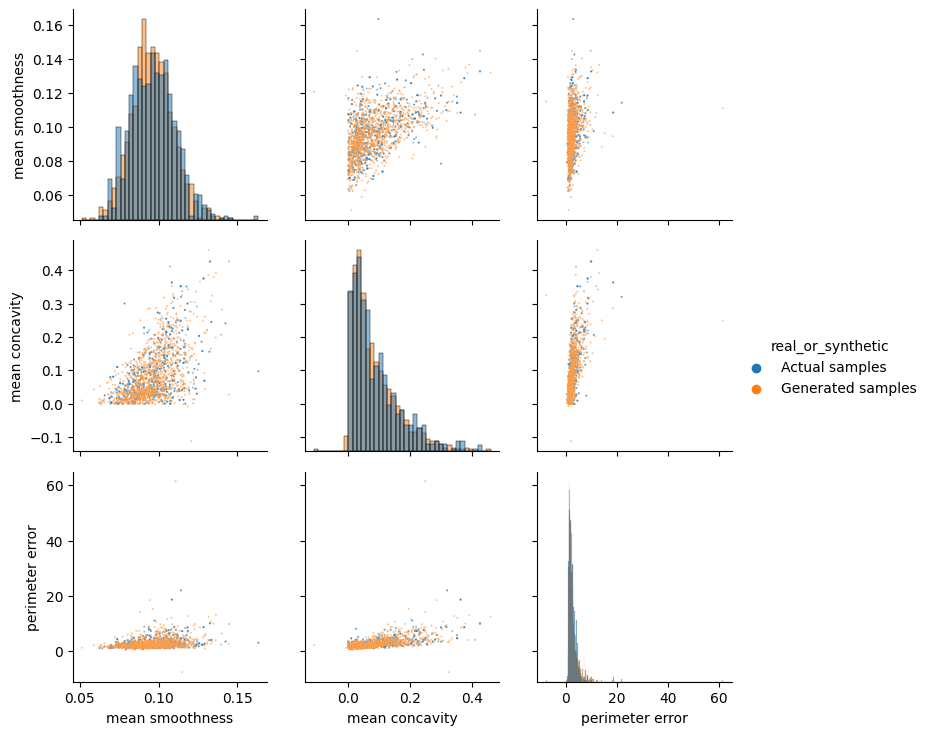

In [30]:
from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

## Outlier detection

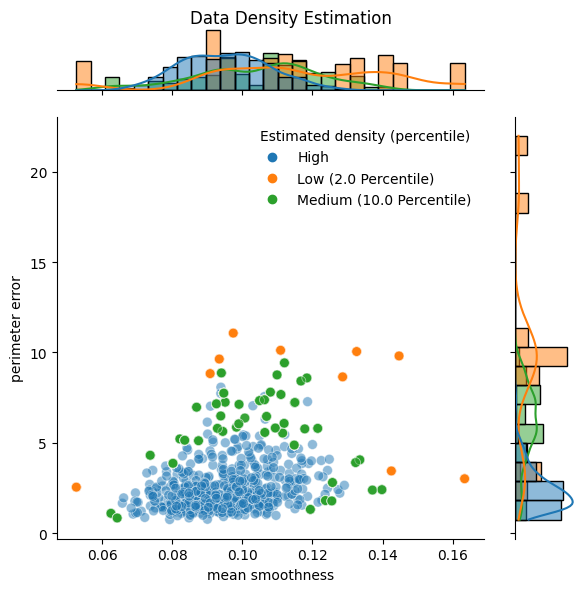

In [31]:
import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)